# Tokyo Housing Prices
github: https://github.com/diyanxu/DSMS-ML
## Dataset information
Source: https://www.kaggle.com/datasets/nishiodens/japan-real-estate-transaction-prices/data

This Dataset consists of real estate sales that occured in Japan from 2005 to 2019, datapoints contianed in the dataset consists of real estate sales  of all types from farmland to residential land spanning all 47 prefectures in Japan. The goal of this supervised learning model is to create a model which will take in certian fields and predict the sale price of the land. Models like that would be able to help estimate land value for future listings and manage sale expectaitons.

Important Datafields

- Type: Type of real estate from farmland to residential land
- Prefecture: The name of prefecture the sale occured
- TradePrice: The sale price of the real estate (Target)
- Area: The area in $m^2$ of the real estate
- Frontage: Frontage of real estate in $m$
- TotalFloorArea: total area of floor for real estate in $m^2$
- FloorAreaRatio: Ratio of Floor Space to Area


## Choice of Data and Data cleaning

Due to the large nature of the dataset, we opted to just use 1 prefecture worth of data to run an analysis. The prefecture we opted to chose was the Tokyo prefecture



In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
# Importing data in zip into dataframe
with zipfile.ZipFile('./data/prices.zip') as z:
    with z.open('prices.csv') as f:
        data = pd.read_csv(f, low_memory=Fals

We will first look at a summary of our data

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406575 entries, 0 to 406574
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   No                           406575 non-null  int64  
 1   Type                         406575 non-null  object 
 2   Region                       221704 non-null  object 
 3   MunicipalityCode             406575 non-null  int64  
 4   Prefecture                   406575 non-null  object 
 5   Municipality                 406575 non-null  object 
 6   DistrictName                 406329 non-null  object 
 7   NearestStation               404847 non-null  object 
 8   TimeToNearestStation         396236 non-null  object 
 9   MinTimeToNearestStation      396236 non-null  float64
 10  MaxTimeToNearestStation      396086 non-null  float64
 11  TradePrice                   406575 non-null  int64  
 12  FloorPlan                    178131 non-null  object 
 13 

We can see that there just over 400,000 rows in the dataset and some columns have a significant number of rows with Null values, we will first take a look at the number of null values in each column

In [7]:
data.isna().sum()

No                                  0
Type                                0
Region                         184871
MunicipalityCode                    0
Prefecture                          0
Municipality                        0
DistrictName                      246
NearestStation                   1728
TimeToNearestStation            10339
MinTimeToNearestStation         10339
MaxTimeToNearestStation         10489
TradePrice                          0
FloorPlan                      228444
Area                                0
AreaIsGreaterFlag                   0
UnitPrice                      327072
PricePerTsubo                  327072
LandShape                      185273
Frontage                       203688
FrontageIsGreaterFlag               0
TotalFloorArea                 270150
TotalFloorAreaIsGreaterFlag         0
BuildingYear                    92279
PrewarBuilding                      0
Structure                       88218
Use                             97885
Purpose     

Features such as UnitPrice, PricePerTsubo will not be relevant for this project as they would be directly calucated off the trade price which is the target. Other Features such as Remarks and Prefectures will be dropped as they are also not revelant.

In [9]:
data_temp = data.drop(columns=['UnitPrice', 'PricePerTsubo', 'Prefecture', 'Remarks', 'Purpose', 'Use'])
data_temp['Frontage'] = data_temp['Frontage'].fillna(0)
data_temp['FloorAreaRatio'] = data_temp['FloorAreaRatio'].fillna(0)
data_temp['TotalFloorArea'] = data_temp['TotalFloorArea']
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406575 entries, 0 to 406574
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   No                           406575 non-null  int64  
 1   Type                         406575 non-null  object 
 2   Region                       221704 non-null  object 
 3   MunicipalityCode             406575 non-null  int64  
 4   Municipality                 406575 non-null  object 
 5   DistrictName                 406329 non-null  object 
 6   NearestStation               404847 non-null  object 
 7   TimeToNearestStation         396236 non-null  object 
 8   MinTimeToNearestStation      396236 non-null  float64
 9   MaxTimeToNearestStation      396086 non-null  float64
 10  TradePrice                   406575 non-null  int64  
 11  FloorPlan                    178131 non-null  object 
 12  Area                         406575 non-null  int64  
 13 

Next we will look at a correlation matrix for the numerical columns

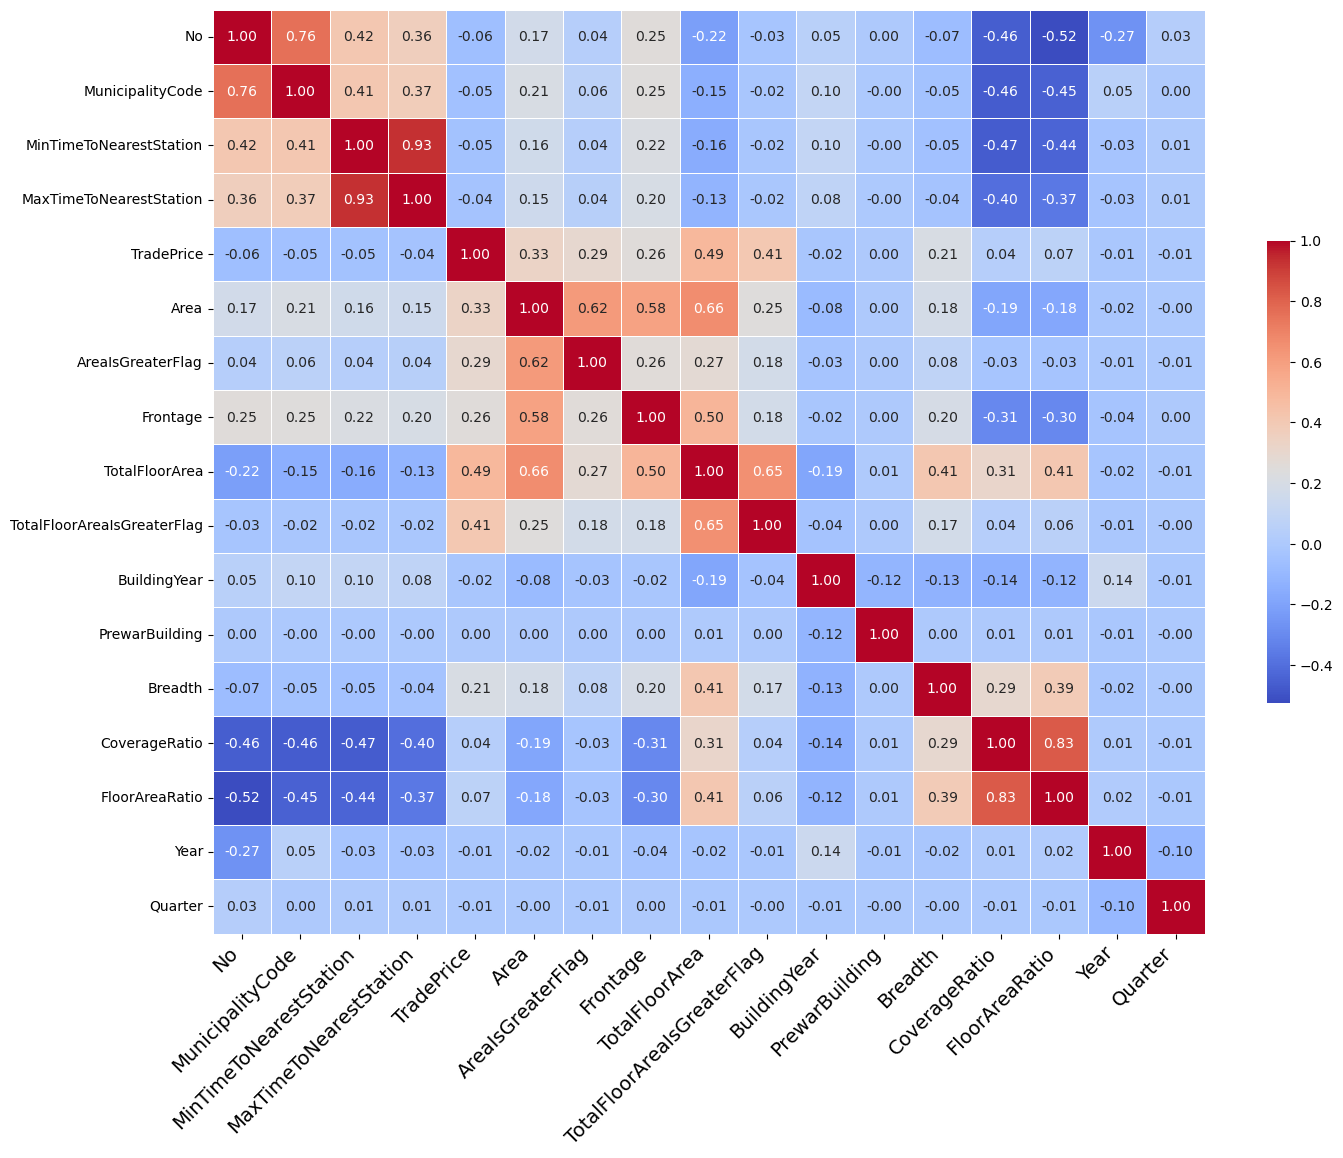

In [87]:
numerical_columns = data_temp.select_dtypes(include=['number']).columns
numeric = data_temp[numerical_columns]
corr = numeric.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

Based off the correlation matrix features such as Area Frontage and TotalFloorArea have some correlation with the Target. Next we will look at if specific categorical features change the matrix in any way.

In [13]:
data_temp.Type.unique()

array(['Pre-owned Condominiums, etc.',
       'Residential Land(Land and Building)',
       'Residential Land(Land Only)', 'Forest Land', 'Agricultural Land'],
      dtype=object)

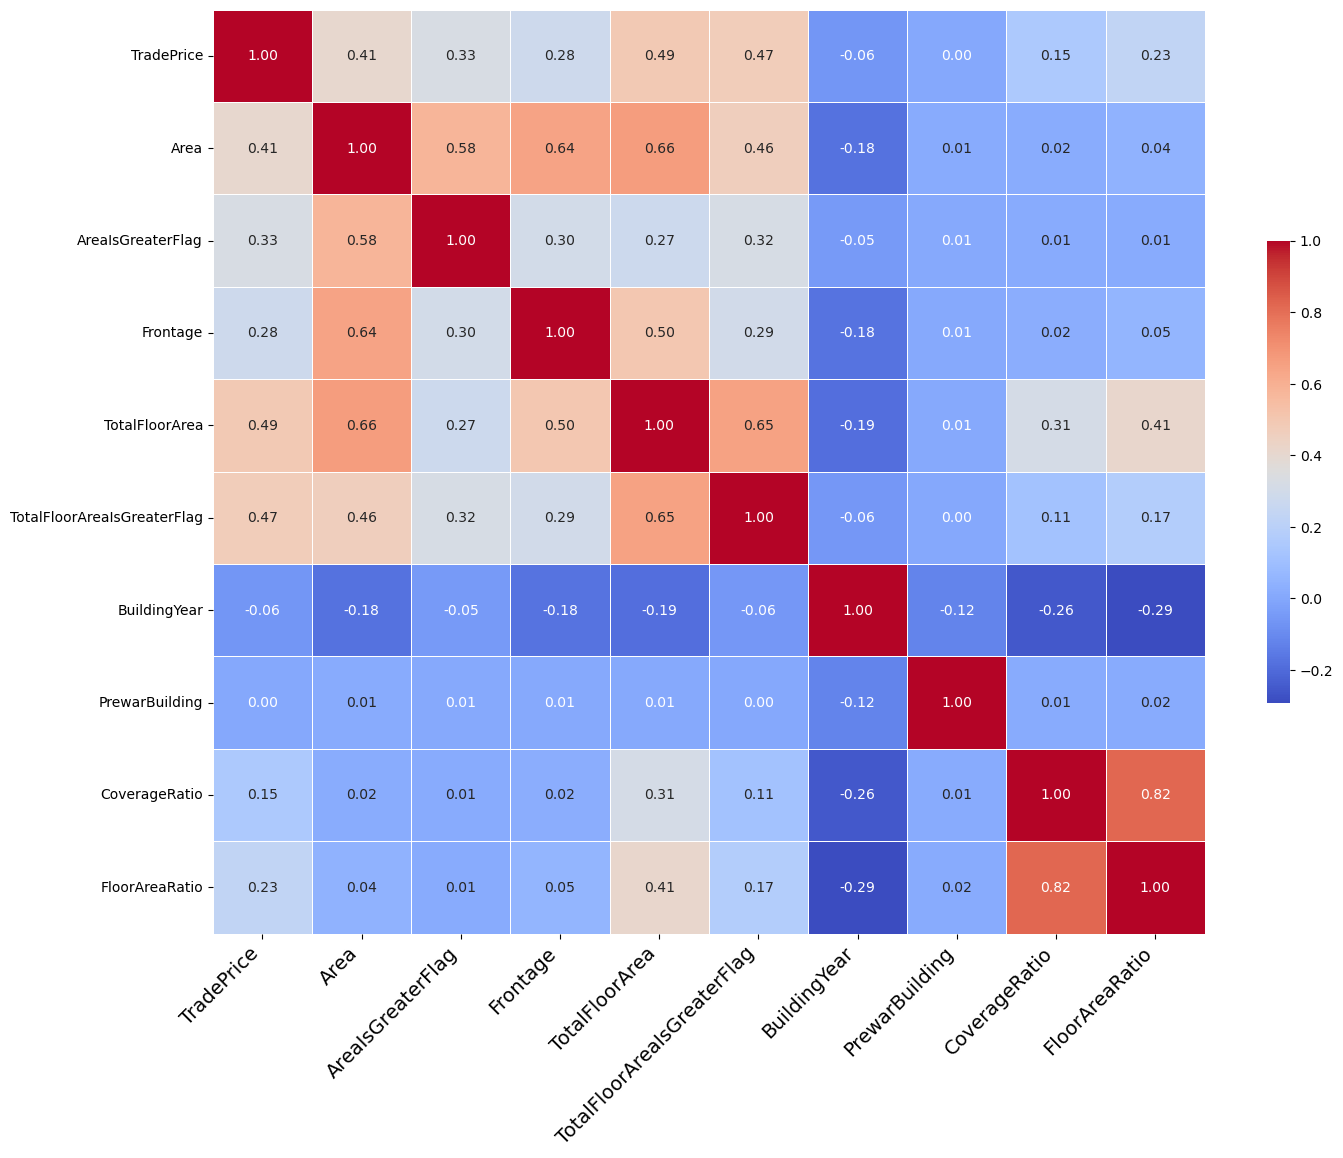

In [89]:
land = data_temp[data_temp['Type'] == 'Residential Land(Land and Building)']
land = land.drop(columns=['No', 'MunicipalityCode', 'MinTimeToNearestStation', 'MaxTimeToNearestStation', 'Year', 'Quarter', 'Breadth'])
numerical_columns = land.select_dtypes(include=['number']).columns
land_numeric = land[numerical_columns]
corr = land_numeric.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

By narrowing down to a single residential type, there can be more correlation seen between features.
Finally we took a pairplot to see if there was any other noticable features, we will remove the features that don't seem to have any relation to our target based off the correlation matrix to make the pair plot more readable

In [16]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406575 entries, 0 to 406574
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   No                           406575 non-null  int64  
 1   Type                         406575 non-null  object 
 2   Region                       221704 non-null  object 
 3   MunicipalityCode             406575 non-null  int64  
 4   Municipality                 406575 non-null  object 
 5   DistrictName                 406329 non-null  object 
 6   NearestStation               404847 non-null  object 
 7   TimeToNearestStation         396236 non-null  object 
 8   MinTimeToNearestStation      396236 non-null  float64
 9   MaxTimeToNearestStation      396086 non-null  float64
 10  TradePrice                   406575 non-null  int64  
 11  FloorPlan                    178131 non-null  object 
 12  Area                         406575 non-null  int64  
 13 

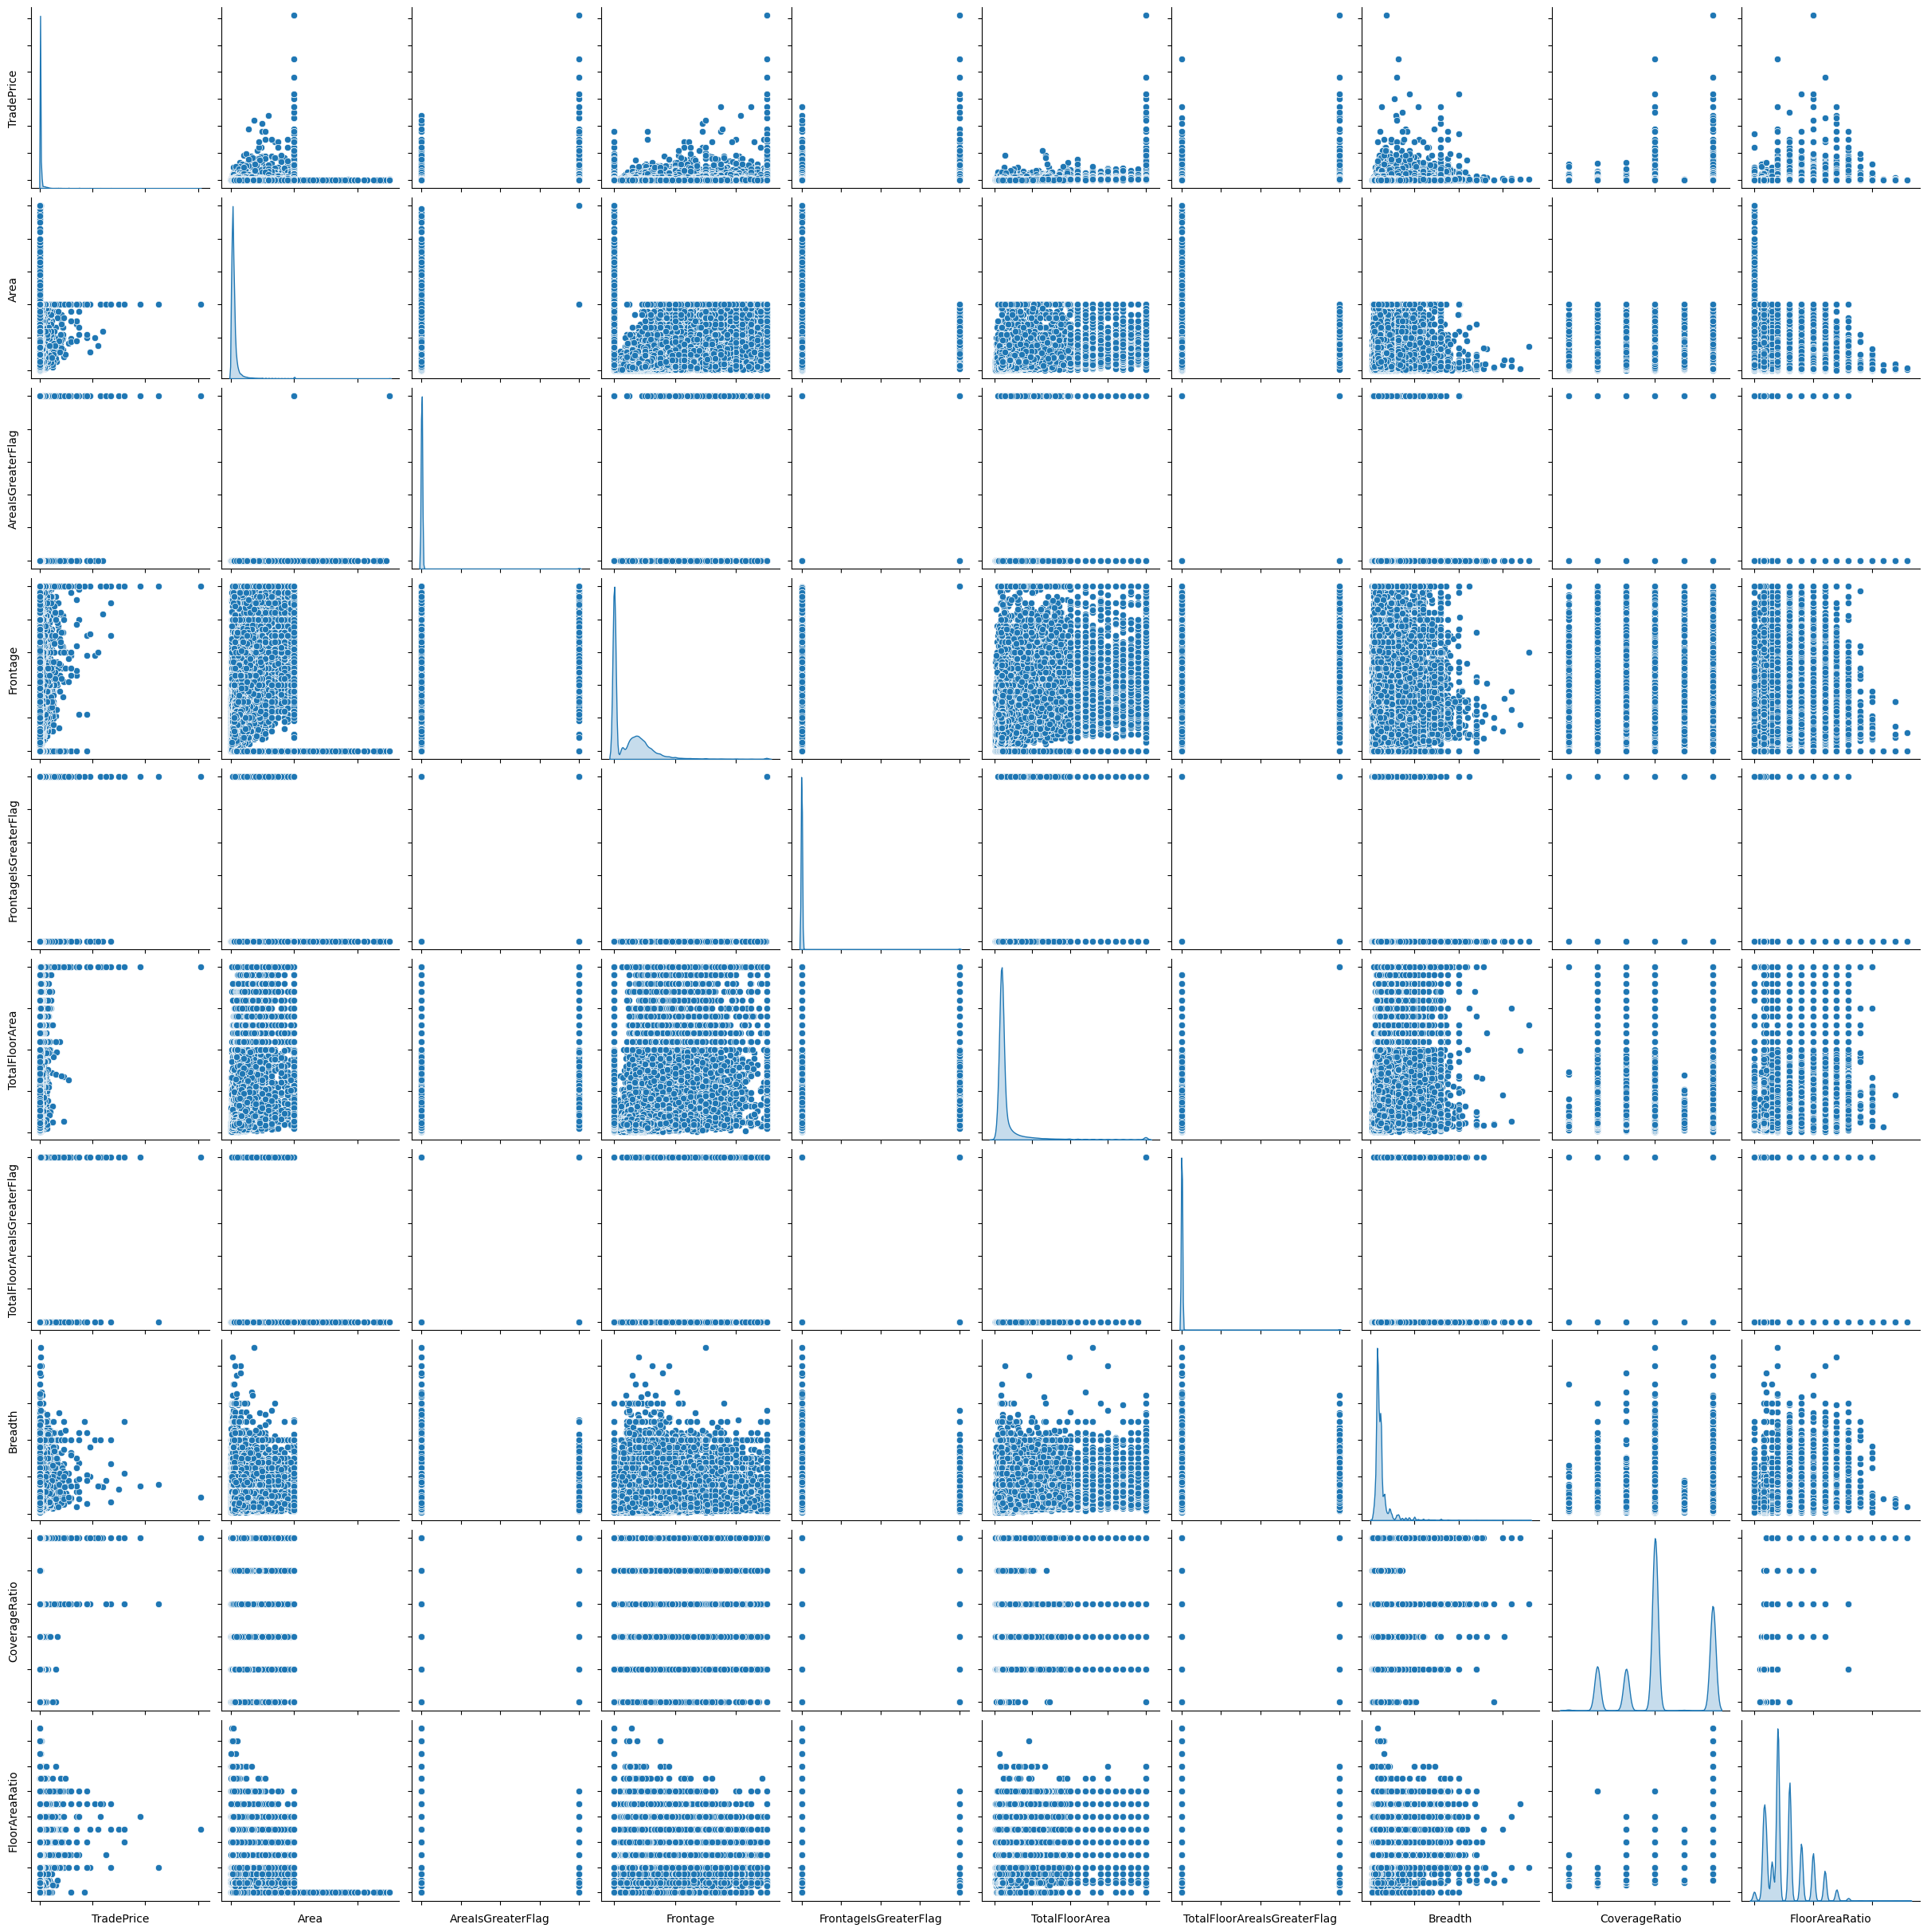

In [17]:
pair_temp = data_temp.drop(columns = ['No', 'MunicipalityCode', 'MinTimeToNearestStation', 'MaxTimeToNearestStation', 
                                      'BuildingYear', 'PrewarBuilding', 'Year', 'Quarter'])
g = sns.pairplot(pair_temp,diag_kind='kde')
g.set(xticklabels=[],yticklabels=[])

From the pairplot it doesnt seem theres too many other features that would add much more information than what was obtained from the correlation matrix.

After all the exploration in the data
# Trainning Decision Tree Regression Model

As a baseline we decided to see the quality of model trained using just the variables without adding categorical variables to see the difference.

In [20]:
def train_test(df, features, depths):
    train, test = train_test_split(df, random_state = 123)
    train_x, train_y = train[features], train['TradePrice']
    test_x, test_y = test[features], test['TradePrice']

    encoded_train = pd.get_dummies(train_x)
    print('=========== Features ===========')
    print(features)
    for depth in depths:
        reg = DecisionTreeRegressor(max_depth = depth)
        reg.fit(encoded_train, train_y)
        print('Depth: ', reg.get_depth())
        print('Train Score:', reg.score(encoded_train, train_y))
        print('Test Score:', reg.score(pd.get_dummies(test_x), test_y))
    return reg.score(pd.get_dummies(test_x), test_y)
features = ['Area']
depths = [40]
train_test(data_temp, features, depths)

=========== Features ===========
['Area']
Depth:  14
Train Score: 0.14577150269103878
Test Score: 0.17313621946152657


0.17313621946152657

As a baseline we set max depth to 40 and only feature to be Area, next we will slowly add features to see how that improves the scores

In [58]:
addition_features = ['Type', 'Region','Frontage', 'FrontageIsGreaterFlag', 
                     'TotalFloorArea', 'Classification', 'CoverageRatio', 
                     'FloorAreaRatio', 'Direction']
res = []
for f in addition_features:
    s = train_test(data_temp, ['Area', f], [40])
    res.append((f, s))
res

=========== Features ===========
['Area', 'Type']
Depth:  18
Train Score: 0.18544736803903827
Test Score: 0.1948676649234662
=========== Features ===========
['Area', 'Region']
Depth:  20
Train Score: 0.26078769187112993
Test Score: 0.25275532496434494
=========== Features ===========
['Area', 'Frontage']
Depth:  36
Train Score: 0.3032398093937847
Test Score: -0.0645309630690436
=========== Features ===========
['Area', 'FrontageIsGreaterFlag']
Depth:  15
Train Score: 0.15875875193827638
Test Score: 0.16138428007070427
=========== Features ===========
['Area', 'TotalFloorArea']
Depth:  30
Train Score: 0.3197965808866382
Test Score: 0.2041502665987227
=========== Features ===========
['Area', 'Classification']
Depth:  25
Train Score: 0.2205386211062026
Test Score: 0.22409184979134178
=========== Features ===========
['Area', 'CoverageRatio']
Depth:  20
Train Score: 0.2826450198883501
Test Score: 0.27675540550549704
=========== Features ===========
['Area', 'FloorAreaRatio']
Depth:  22
T

[('Type', 0.1948676649234662),
 ('Region', 0.25275532496434494),
 ('Frontage', -0.0645309630690436),
 ('FrontageIsGreaterFlag', 0.16138428007070427),
 ('TotalFloorArea', 0.2041502665987227),
 ('Classification', 0.22409184979134178),
 ('CoverageRatio', 0.27675540550549704),
 ('FloorAreaRatio', 0.288999019526627),
 ('Direction', 0.13474354536185051)]

From the first round of testing it shows that the FloorAreaRatio Region imporves test scores from 0.17 to 0.29. We continued to test using the above method and the optimal features we found were the features which produce the highest test scores of 0.31 being Area, FloorAreaRatio and FrontageIsGreaterFlag, any additional feautures only improved the train score and reduced test score which could mean over fitting

Train Score: 0.4979883372493802
Test Score: 0.30732194968280324
[0.43315063 0.50560827 0.0612411 ]


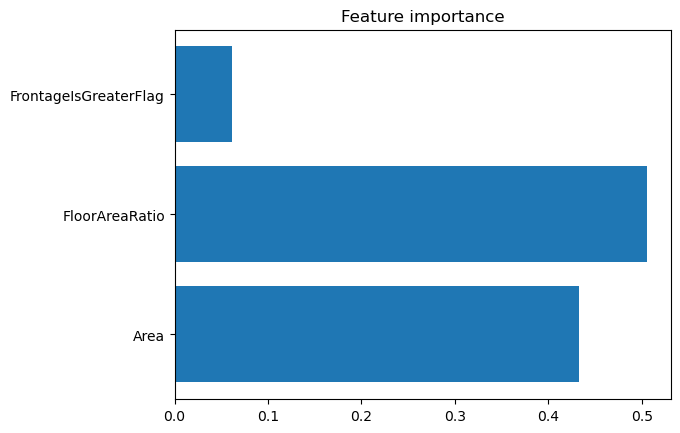

In [103]:
features = ['Area','FloorAreaRatio', 'FrontageIsGreaterFlag']
train, test = train_test_split(data_temp, random_state = 123)
train_x, train_y = train[features], train['TradePrice']
test_x, test_y = test[features], test['TradePrice']

encoded_train = pd.get_dummies(train_x)
reg = DecisionTreeRegressor()
reg.fit(encoded_train, train_y)
print('Train Score:', reg.score(encoded_train, train_y))
print('Test Score:', reg.score(pd.get_dummies(test_x), test_y))
print(reg.feature_importances_)
plt.barh(features, reg.feature_importances_)
plt.title('Feature importance')
plt.show()

As a benchmark we also trained a linear regression model using the same features and got the following result

In [26]:
from sklearn.linear_model import LinearRegression
train, test = train_test_split(data_temp, random_state = 123)
train_x, train_y = train[features], train['TradePrice']
test_x, test_y = test[features], test['TradePrice']
linear = LinearRegression().fit(train_x, train_y)
print('train score:', linear.score(train_x, train_y))
print('test score:', linear.score(test_x, test_y))

train score: 0.1306449798543281
test score: 0.152004226450543


Running a linear model shows the score is only 0.13 for trainning and 0.15 for testing set.

# Final Model
The final model we were able to train using the Tokyo Prefecture dataset was a decision tree regession model trained using the features Area FloorArea Ratio and FrontageIsGreaterFlag with a training score of 0.498 and a test score of 0.308

## Areas of improvement
Unfortunetly we were only able to get a trainning score of around 0.5 and a test score or around 0.3, these scores are not the highest and while we were able to increase training scores by adding more features but it would result in overfitting and a reduction in testing score in the model selected. One point of improvement could be the use of a different model over decision tree regression.
